Імпорт бібліотек

In [10]:
# Імпорт бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


Завантаження Kaggle-набору

In [11]:
#(eCommerce Customer Service Satisfaction)
file_path = 'Customer_support_data.csv'
data = pd.read_csv(file_path)

# Ознайомлення з даними
print(data.head())
print(data.info())
print(data.describe())

                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   
1  d406b0c7-ce17-4654-b9de-f08d421254bd             NaN  01/08/2023 12:52   
2  c273368d-b961-

Створення набору даних за допомогою make_classification

In [12]:
X_generated, y_generated = make_classification(
    n_samples=1000,  # Кількість записів
    n_features=10,   # Кількість ознак
    n_informative=5, # Кількість інформативних ознак
    n_redundant=2,   # Кількість надлишкових ознак
    n_classes=2,     # Кількість класів
    random_state=42
)

# Перетворення на DataFrame
generated_data = pd.DataFrame(X_generated, columns=[f'Feature_{i}' for i in range(1, 11)])
generated_data['Target'] = y_generated

# Ознайомлення зі створеним набором
print(generated_data.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   1.125100   1.178124   0.493516   0.790880  -0.614278   1.347020   
1  -0.564641   3.638629  -1.522415  -1.541705   1.616697   4.781310   
2   0.516313   2.165426  -0.628486  -0.386923   0.492518   1.442381   
3   0.537282   0.966618  -0.115420   0.670755  -0.958516   0.871440   
4   0.278385   1.065828  -1.724917  -2.235667   0.715107   0.731249   

   Feature_7  Feature_8  Feature_9  Feature_10  Target  
0   1.419515   1.357325   0.966041   -1.981139       1  
1   3.190292  -0.890254   1.438826   -3.828748       0  
2   1.332905  -1.958175  -0.348803   -1.804124       0  
3   0.508186  -1.034471  -1.654176   -1.910503       1  
4  -0.674119   0.598330  -0.524283    1.047610       0  


Створення власного набору за допомогою numpy та random

In [13]:
# Створення даних
np.random.seed(42)
n_samples = 500

# Генерація числових ознак
feature_1 = np.random.uniform(0, 10, n_samples)  # Значення від 0 до 10
feature_2 = np.random.normal(5, 2, n_samples)   # Нормальний розподіл
feature_3 = np.random.randint(0, 2, n_samples)  # Бінарна ознака

# Генерація цільової змінної
target = (feature_1 + feature_2 > 10).astype(int)  # Логіка для створення класів

# Створення DataFrame
custom_data = pd.DataFrame({
    'Feature_1': feature_1,
    'Feature_2': feature_2,
    'Feature_3': feature_3,
    'Target': target
})

# Ознайомлення з власним набором
print(custom_data.head())

   Feature_1  Feature_2  Feature_3  Target
0   3.745401   5.683512          0       0
1   9.507143   8.752342          0       1
2   7.319939   6.900848          1       1
3   5.986585   3.846193          1       0
4   1.560186   3.203171          0       0


Попередня обробка даних

In [14]:
# Вибір даних для моделювання (використовуйте один із наборів)
selected_data = generated_data  # Замість generated_data можна використати data або custom_data

# Перевірка пропущених значень
print(selected_data.isnull().sum())

# Масштабування ознак
X = selected_data.drop(columns=['Target'])  # Цільова змінна
y = selected_data['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Поділ на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Target        0
dtype: int64


Створення нейронної мережі

In [15]:
# Архітектура моделі
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')  # Кількість виходів дорівнює кількості класів
])

# Компіляція моделі
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Тренування моделі
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5353 - loss: 0.6850 - val_accuracy: 0.8450 - val_loss: 0.4973
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7984 - loss: 0.4933 - val_accuracy: 0.8950 - val_loss: 0.3653
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8450 - loss: 0.4162 - val_accuracy: 0.9100 - val_loss: 0.2968
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8288 - loss: 0.3895 - val_accuracy: 0.9200 - val_loss: 0.2612
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8778 - loss: 0.2998 - val_accuracy: 0.9200 - val_loss: 0.2428
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9006 - loss: 0.2882 - val_accuracy: 0.9200 - val_loss: 0.2231
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8869 - loss: 0.2878 - val_accuracy: 0.9250 - val_loss: 0.2133
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8898 - loss: 0.2577 - val_accuracy: 0.9400 - val_loss: 0.2011
Epo

Оцінка моделі

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9895 - loss: 0.0627 
Точність на тестовій вибірці: 0.99
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       112
           1       0.97      1.00      0.98        88

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200

Матриця плутанини:
[[109   3]
 [  0  88]]
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


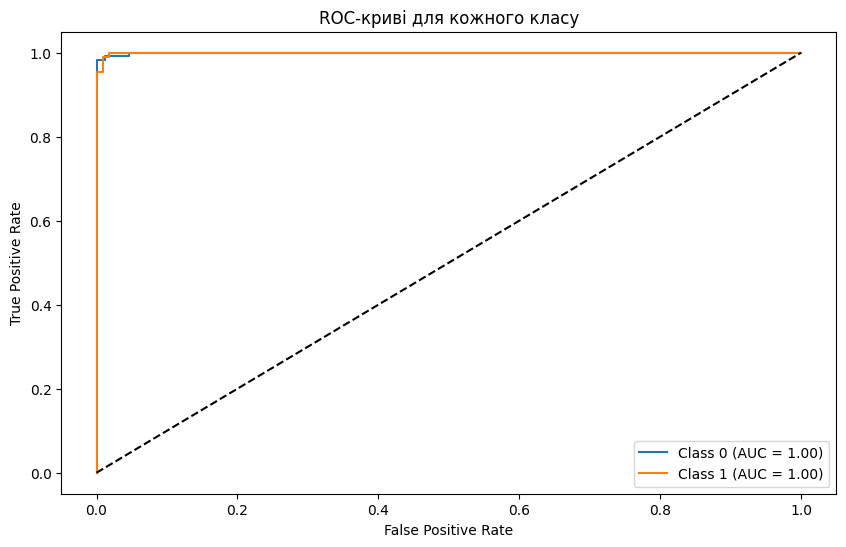

In [16]:
# Оцінка на тестовій вибірці
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Точність на тестовій вибірці: {test_accuracy:.2f}")

# Класифікаційний звіт
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred))

# Матриця плутанини
conf_matrix = confusion_matrix(y_test, y_pred)
print("Матриця плутанини:")
print(conf_matrix)

# Побудова ROC-кривих
plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y))):
    y_test_bin = (y_test == i).astype(int)
    y_pred_bin = model.predict(X_test)[:, i]
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred_bin)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-криві для кожного класу')
plt.legend()
plt.show()

Збереження результатів

In [17]:
model.save('classification_model.keras')